In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Сгенерируйте случайную матрицу смежности для простого неориентированного невзвешенного графа со 100 вершинами и 200 ребрами (обратите внимание, что матрица должна быть симметричной и содержать только 0 и 1 в качестве элементов). Преобразуйте матрицу смежности в список смежности. Визуализируйте граф и выведите несколько строк матрицы смежности и списка смежности. Для каких целей удобнее использовать каждое из представлений?

In [153]:
def random_matrix(N = 100, V = 200):
    M = np.zeros((N,N))
    vertices = []
    for i in range(V):
        x, y = np.random.randint(0,N,size = 2)
        while (M[x,y] == 1 or M[y,x] == 1) or x==y:
            x, y = np.random.randint(0,N,size = 2)
        M[x,y] = 1
        M[y,x] = 1
        vertices.append((x,y))
    return M, vertices
            
def vertix(M):
    verts = []
    for i in range(len(M)):
        v = np.where(M[i]!=0)
       # print(v)
        print(i,*v[0])

In [164]:
N = 100
V = 200
M, v = random_matrix(N = N, V = V)
print("Adjacency list")
print("--------------")
vertix(M)

Adjacency list
--------------
0 36 39
1 24 78
2 31 46 50 69 75
3 38 43 56 84
4 8 17 19 52 57 82
5 10 44 67 85
6 45 83 93
7 56 83 90 91
8 4 36 95
9 36 76 79 90
10 5 11 46 50 55
11 10 25 33 35 86 92
12 44 45 73
13 23 26 62 80
14 22 32 34 42 54 57
15 54
16
17 4 35 61
18 48 96
19 4 27 50 82 95
20 46 62 78 79
21 22 23 39 47 50 52 62
22 14 21 56 61 67 78 80 85
23 13 21
24 1 27 28 43 65 80
25 11 42 62 75 80
26 13 54 56
27 19 24 84 93
28 24 81
29 64 72 78
30 61 62 82
31 2 32 75 90 93
32 14 31 61 73
33 11 38 48 54 70 82
34 14 50 73
35 11 17 43 78 81 83 88 94
36 0 8 9 51 66 74 78 98
37 41 78
38 3 33 72 99
39 0 21 85 87 90
40 59
41 37 84
42 14 25 64
43 3 24 35 52 75 86 94
44 5 12 66
45 6 12 89 98
46 2 10 20 97
47 21 85
48 18 33 51 79
49 53 72
50 2 10 19 21 34 72 89
51 36 48 58
52 4 21 43
53 49 67 93
54 14 15 26 33 66 67 72 86
55 10
56 3 7 22 26
57 4 14
58 51 59 79 80
59 40 58 71 91 97
60 88 96
61 17 22 30 32 88
62 13 20 21 25 30 80
63 66 68 90 96
64 29 42 65 91
65 24 64 77 85
66 36 44 54 63 71
67

Count of v is 200
[(94, 55), (91, 61), (69, 55), (28, 93), (16, 3), (41, 60)] ...
     ... [(68, 97), (74, 71), (7, 37), (10, 47), (10, 15), (43, 72)]


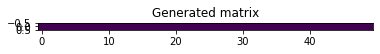

In [157]:
plt.imshow(M[49:50,:50])
plt.title("Generated matrix")
print("Count of v is %d"%len(v))
print(v[:6],"...\n     ...",v[-6:])

In [169]:
M[:5, :10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [121]:
G = nx.from_numpy_matrix(np.matrix(A))
edge_labels=nx.draw_networkx_edge_labels(G,pos=nx.spring_layout(G))
nx.draw(G)
plt.show()

NameError: name 'A' is not defined

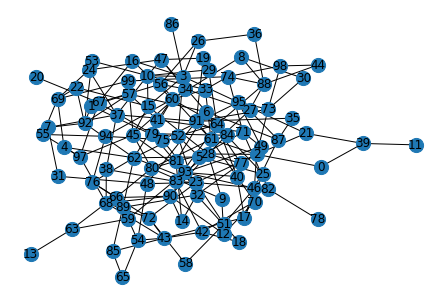

In [158]:
G = show_graph_with_labels(M)

 Используйте поиск в глубину, чтобы найти связанные компоненты графа, и поиск в ширину, чтобы найти кратчайший путь между двумя случайными вершинами. Проанализируйте результаты.

In [159]:
from networkx.algorithms.components import connected_components

In [160]:
S = [G.subgraph(c).copy() for c in connected_components(G)]

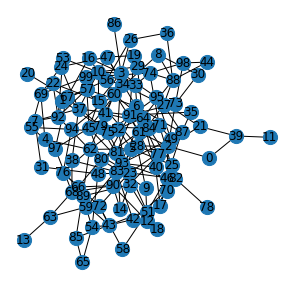

In [161]:
plt.figure(figsize = (5, len(S)*5))
for i in range(1,len(S)+1):
    plt.subplot(len(S),1,i)
    nx.draw_kamada_kawai(S[i-1], node_size=200,  with_labels=True)

In [131]:
sourse = np.random.randint(0,N)
target = np.random.randint(0,N)
print("Shortest path from %d to %d: "%(sourse, target))

bfs = np.asarray(list(nx.bfs_edges(g, source = sourse)))
path = []

while target!= sourse:
    path.append(target)
    x = np.where(bfs[:,1] == target)[0]
    target = bfs[x][0][0]     
    #print(target)
    
path.append(sourse)
print(path[::-1]) 
print("It's lenght: ",len(path)-1)


Shortest path from 89 to 61: 
[89, 52, 38, 21, 81, 61]
It's lenght:  5


Опишите структуры данных и методы проектирования, которые использованы в рассматриваемых алгоритмах.